In [14]:
import pafy
import cv2

url = "https://www.youtube.com/watch?v=lkIJYc4UH60"
video = pafy.new(url)
best = video.getbest(preftype="mp4")

capture = cv2.VideoCapture(best.url)

In [15]:
ret, frame = capture.read()

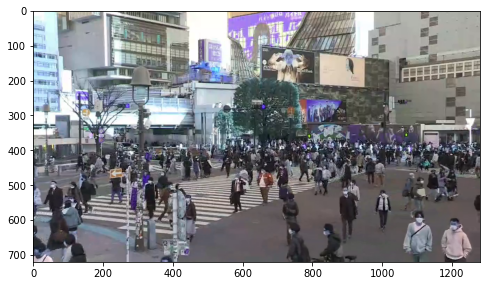

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(frame);

In [4]:
frame.shape

(720, 1280, 3)

In [5]:
import pandas as pd
import numpy as np

In [8]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [10]:
pd.merge(df1, df2, how='outer', indicator=True)

,lkey,value,rkey,_merge
0,foo,1,NaN,left_only
1,bar,2,NaN,left_only
2,baz,3,NaN,left_only
3,foo,5,foo,both
4,NaN,6,bar,right_only
5,NaN,7,baz,right_only
6,NaN,8,foo,right_only


In [22]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy

from pycuda.compiler import SourceModule
mod = SourceModule("""
__global__ void multiply_them(float *dest, float *a, float *b)
{
  const int i = threadIdx.x;
  dest[i] = a[i] * b[i];
}
""")

multiply_them = mod.get_function("multiply_them")

a = numpy.random.randn(400).astype(numpy.float32)
b = numpy.random.randn(400).astype(numpy.float32)

dest = numpy.zeros_like(a)
multiply_them(
        drv.Out(dest), drv.In(a), drv.In(b),
        block=(400,1,1), grid=(1,1))

print(dest-a*b)

ModuleNotFoundError: No module named 'pycuda'